In [38]:
import os

def delete_directory_contents(directory):
    # Get the list of files and subdirectories in the specified directory
    contents = os.listdir(directory)

    # Iterate over the contents and delete files or recursively delete subdirectories
    for item in contents:
        item_path = os.path.join(directory, item)
        if os.path.isfile(item_path):
            os.remove(item_path)
        elif os.path.isdir(item_path):
            delete_directory_contents(item_path)
            os.rmdir(item_path)

# Specify the directory whose contents you want to delete
directory_path = '/kaggle/working/'

# Delete the contents of the directory
delete_directory_contents(directory_path)

In [39]:
import os

# Specify the parent folder name
parent_folder_name = 'new_train'

# Create the parent folder in the working directory
parent_folder_path = '/kaggle/working' + parent_folder_name
os.makedirs(parent_folder_path, exist_ok=True)

# Specify the sub-folder names
subfolder1_name = 'Yawn'
subfolder2_name = 'No_Yawn'

# Create the sub-folders within the parent folder
subfolder1_path = os.path.join(parent_folder_path, subfolder1_name)
subfolder2_path = os.path.join(parent_folder_path, subfolder2_name)
os.makedirs(subfolder1_path, exist_ok=True)
os.makedirs(subfolder2_path, exist_ok=True)

print(f"Parent folder '{parent_folder_name}' created in the working directory.")
print(f"Sub-folders '{subfolder1_name}' and '{subfolder2_name}' created within the parent folder.")

Parent folder 'new_train' created in the working directory.
Sub-folders 'Yawn' and 'No_Yawn' created within the parent folder.


In [40]:
import cv2
import os

def crop_faces_from_dataset(input_dir, output_dir):
    # Load the pre-trained Haar cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate over all files in the input directory
    for filename in os.listdir(input_dir):
        # Check if the file is an image
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Load the image
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path)

            # Convert the image to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100,100))

            # Crop and save each face as a separate image
            for i, (x, y, w, h) in enumerate(faces):
                face = image[y:y + h, x:x + w]
                face_filename = os.path.join(output_dir, f"{filename.split('.')[0]}_face_{i}.jpg")
                cv2.imwrite(face_filename, face)

    print(f"Face cropping completed. Cropped faces saved to {output_dir}.")

In [41]:
# Set the input and output directories
input_dir = '/kaggle/input/yawn-no-yawn/no_yawn'
output_dir = '/kaggle/working/new_train/No_Yawn'

# Crop faces from the input dataset and save them to the output directory
crop_faces_from_dataset(input_dir, output_dir)

Face cropping completed. Cropped faces saved to /kaggle/working/new_train/No_Yawn.


In [42]:
# Set the input and output directories
input_dir = '/kaggle/input/yawn-no-yawn/yawn'
output_dir = '/kaggle/working/new_train/Yawn'

# Crop faces from the input dataset and save them to the output directory
crop_faces_from_dataset(input_dir, output_dir)

Face cropping completed. Cropped faces saved to /kaggle/working/new_train/Yawn.


In [43]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [44]:
tensorflow.test.is_gpu_available()
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [45]:
labels = os.listdir("/kaggle/working/new_train")
labels

['Yawn', 'No_Yawn']

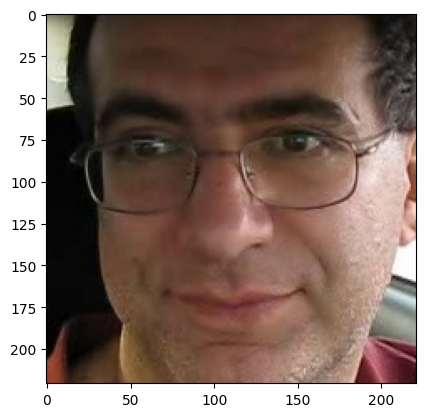

In [46]:
plt.imshow(plt.imread("/kaggle/working/new_train/No_Yawn/702_face_0.jpg"))

In [48]:
a = plt.imread("/kaggle/working/new_train/No_Yawn/1067_face_1.jpg")

In [49]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)
train_data = train_data_gen.flow_from_directory("/kaggle/working/new_train", target_size=(200,200), batch_size=16, class_mode='categorical', subset='training')

Found 592 images belonging to 2 classes.


In [50]:
validation_data = train_data_gen.flow_from_directory("/kaggle/working/new_train", target_size=(200,200), batch_size=16, class_mode='categorical', subset= 'validation')

Found 147 images belonging to 2 classes.


In [51]:
test_data_gen = ImageDataGenerator(rescale=1./255)
test_data = test_data_gen.flow_from_directory("/kaggle/working/new_train",target_size=(200,200),batch_size=16,class_mode='categorical')

Found 739 images belonging to 2 classes.


In [52]:
train_data

In [53]:
test_data

In [54]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(200,200,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 256)     7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)      

In [55]:
validation_steps = len(test_data)
validation_steps

47

In [56]:
hist = model.fit(train_data, epochs=60, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/60


2023-09-18 21:05:27.063619: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


37/37 [==============================] - 12s 250ms/step - loss: 0.6987 - accuracy: 0.5473 - val_loss: 0.6072 - val_accuracy: 0.7118
Epoch 2/60
37/37 [==============================] - 8s 226ms/step - loss: 0.5846 - accuracy: 0.6655 - val_loss: 0.5364 - val_accuracy: 0.7212
Epoch 3/60
37/37 [==============================] - 8s 224ms/step - loss: 0.5331 - accuracy: 0.7095 - val_loss: 0.5119 - val_accuracy: 0.7294
Epoch 4/60
37/37 [==============================] - 8s 225ms/step - loss: 0.4865 - accuracy: 0.7314 - val_loss: 0.4714 - val_accuracy: 0.7754
Epoch 5/60
37/37 [==============================] - 8s 226ms/step - loss: 0.3933 - accuracy: 0.8277 - val_loss: 0.2771 - val_accuracy: 0.8958
Epoch 6/60
37/37 [==============================] - 8s 225ms/step - loss: 0.3454 - accuracy: 0.8564 - val_loss: 0.2913 - val_accuracy: 0.8633
Epoch 7/60
37/37 [==============================] - 8s 224ms/step - loss: 0.2976 - accuracy: 0.8649 - val_loss: 0.4026 - val_accuracy: 0.7984
Epoch 8/60
37/37

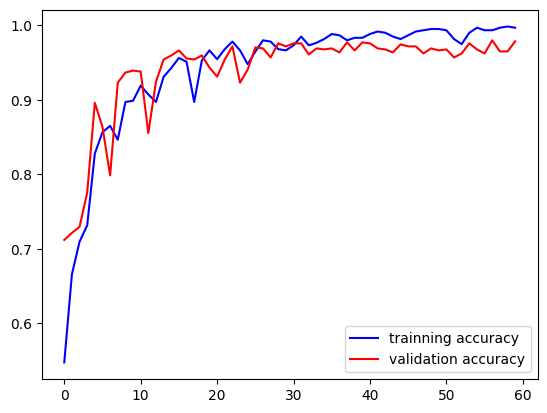

In [57]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

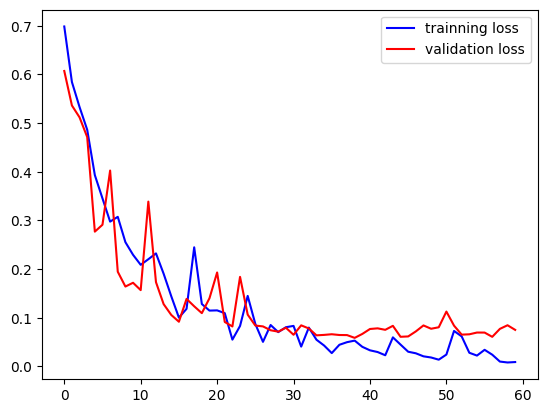

In [58]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [59]:
model.save("yawn_no_yawn.h5")
model.save("yawn_no_yawn.model")

In [60]:
from keras.models import load_model
import cv2
from PIL import Image
from keras.preprocessing import image
import numpy as np
model = load_model('yawn_no_yawn.h5')

In [61]:
prediction = model.predict(test_data)

47/47 [==============================] - 2s 37ms/step


In [62]:
labels_new = ["Yawn", "No_yawn"]
def prepare(filepath, face_cas= 'haarcascade_frontalface_default.xml'):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (200, 200))
    return resized_array.reshape(-1, 200, 200, 3)

In [63]:
prediction = model.predict([prepare("/kaggle/working/new_train/No_Yawn/1039_face_0.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 91ms/step


1